In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [6]:
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [7]:
def display_images(orig, restored):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.imshow(orig); ax1.set_title('Noisy Input'); ax1.axis('off')
    ax2.imshow(restored); ax2.set_title('Restored Output'); ax2.axis('off')
    plt.show()

(300, 400, 3)


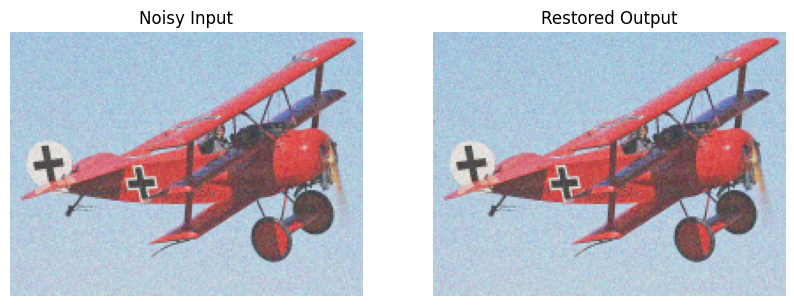

In [8]:
noisy_path = Path('..','Data', 'Transformed', 'Noise', 'Fokker-Dr.-I_add_noise_mean0p15_var0p1.jpg')
noisy = cv2.imread(noisy_path, cv2.IMREAD_COLOR)
noisy = cv2.cvtColor(noisy, cv2.COLOR_BGR2RGB)
# print(noisy.shape)
#resize to 300x400
noisy = cv2.resize(noisy, (400, 300), interpolation=cv2.INTER_AREA)
print(noisy.shape)
#noisy = cv2.imread(noisy_path, cv2.IMREAD_GRAYSCALE)
downscale_factor = 0.5
noisy = cv2.resize(
    noisy,
    (0, 0),
    fx=downscale_factor,
    fy=downscale_factor,
    interpolation=cv2.INTER_AREA
)
if noisy is None:
    raise FileNotFoundError(f"Cannot load image at {noisy_path}")
# Display noisy input
display_images(noisy, noisy)

In [ ]:
import numpy as np
from MarkovObjects.GibbsEstimator import (
    LpLoss, LorentzianLoss, SparseGradientPrior,
    WindowPatternTerm, GridMRF, GibbsSampler
)

# pick your loss, prior and (optional) window
loss = LorentzianLoss(sigma=1)
prior = SparseGradientPrior(p=1)
window = WindowPatternTerm(noisy, window_size=3, n_components=5)

# build the MRF
mrf = GridMRF(noisy, loss, prior,
              lambda_r=1, window_term=None, lambda_w=1)


In [6]:
# run Gibbs
num_iter = 80
betas = 1.0#np.linspace(0.1, 10, num_iter)
sampler = GibbsSampler(mrf, num_iter=80, burn_in=40, verbose=True, estimate_mode='map', pior_type_for_optimal='quadratic', betas=betas)
sampler.fit_optimised(parallel_channels=True, shuffle_pixels=True)
denoised = sampler.estimate()

[Channel 1][Iter 10] Loss=253207.29, Energy=256629.36
[Channel 2][Iter 10] Loss=234458.01, Energy=237862.08
[Channel 0][Iter 10] Loss=258269.71, Energy=261097.73
[Channel 2][Iter 20] Loss=232861.51, Energy=236234.23
[Channel 1][Iter 20] Loss=251407.02, Energy=254796.54
[Channel 0][Iter 20] Loss=256446.11, Energy=259244.68
[Channel 2][Iter 30] Loss=232296.47, Energy=235660.79
[Channel 1][Iter 30] Loss=250667.31, Energy=254044.44
[Channel 0][Iter 30] Loss=255721.93, Energy=258508.25
[Channel 1][Iter 40] Loss=250147.11, Energy=253517.46
[Channel 2][Iter 40] Loss=231797.48, Energy=235155.06
[Channel 0][Iter 40] Loss=255280.05, Energy=258060.83
[Channel 1][Iter 50] Loss=249861.32, Energy=253226.67
[Channel 0][Iter 50] Loss=254833.74, Energy=257609.25
[Channel 2][Iter 50] Loss=231522.66, Energy=234876.22
[Channel 1][Iter 60] Loss=249426.86, Energy=252786.61
[Channel 2][Iter 60] Loss=231321.63, Energy=234673.34
[Channel 0][Iter 60] Loss=254558.65, Energy=257330.76
[Channel 1][Iter 70] Loss=24

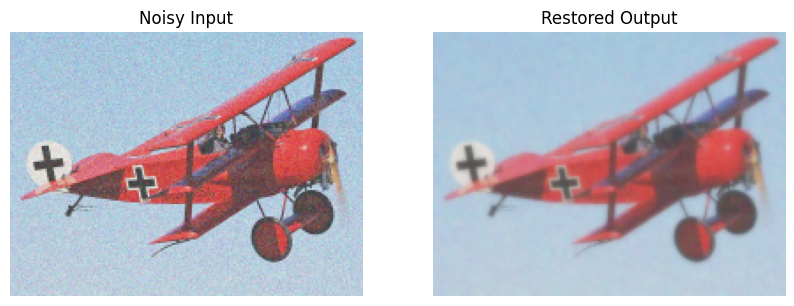

In [7]:
display_images(noisy, denoised)

# MAPE = SA + Quadratic

In [18]:
num_iter = 80
betas = np.linspace(0.01, 1, num_iter)
sampler = GibbsSampler(mrf, num_iter=80, burn_in=40, verbose=True, estimate_mode='map', pior_type_for_optimal='quadratic', betas=betas)
sampler.fit_optimised(parallel_channels=True, shuffle_pixels=True)
denoised = sampler.estimate()

[Channel 1][Iter 10] Loss=311136.94, Energy=317260.30
[Channel 0][Iter 10] Loss=325009.02, Energy=330427.68
[Channel 2][Iter 10] Loss=273081.50, Energy=278766.63
[Channel 1][Iter 20] Loss=296625.91, Energy=301858.27
[Channel 2][Iter 20] Loss=262690.66, Energy=267633.03
[Channel 0][Iter 20] Loss=309384.45, Energy=313958.83
[Channel 1][Iter 30] Loss=285221.09, Energy=289897.61
[Channel 2][Iter 30] Loss=254440.60, Energy=258907.44
[Channel 0][Iter 30] Loss=296480.36, Energy=300521.92
[Channel 2][Iter 40] Loss=248046.26, Energy=252183.80
[Channel 1][Iter 40] Loss=276362.07, Energy=280657.79
[Channel 0][Iter 40] Loss=286011.35, Energy=289679.07
[Channel 2][Iter 50] Loss=243271.64, Energy=247162.96
[Channel 1][Iter 50] Loss=268999.99, Energy=273000.36
[Channel 0][Iter 50] Loss=277650.55, Energy=281042.20
[Channel 1][Iter 60] Loss=262779.25, Energy=266548.87
[Channel 2][Iter 60] Loss=239711.37, Energy=243409.25
[Channel 0][Iter 60] Loss=270749.38, Energy=273925.40
[Channel 2][Iter 70] Loss=23

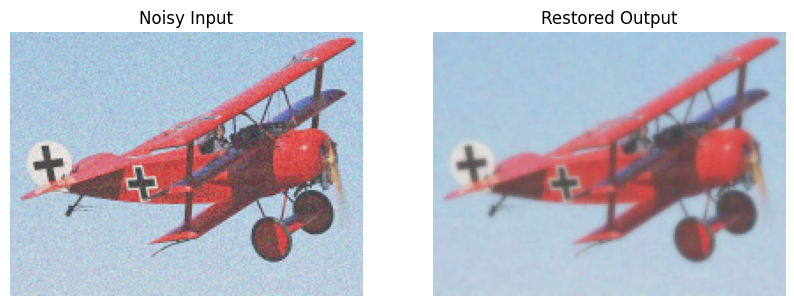

In [19]:
display_images(noisy, denoised)

# MAPE = SA + Potts

In [20]:
# run Gibbs
num_iter = 80
betas = np.linspace(0.01, 1, num_iter)
sampler = GibbsSampler(mrf, num_iter=80, burn_in=40, verbose=True, estimate_mode='map', pior_type_for_optimal='potts', betas=betas)
sampler.fit_optimised(parallel_channels=True, shuffle_pixels=True)
denoised = sampler.estimate()

[Channel 2][Iter 10] Loss=277216.91, Energy=284058.24
[Channel 1][Iter 10] Loss=318620.44, Energy=326140.20
[Channel 0][Iter 10] Loss=334592.89, Energy=341308.66
[Channel 2][Iter 20] Loss=274054.82, Energy=280819.98
[Channel 1][Iter 20] Loss=315695.52, Energy=323126.41
[Channel 0][Iter 20] Loss=331334.77, Energy=337956.87
[Channel 2][Iter 30] Loss=272356.07, Energy=279077.65
[Channel 1][Iter 30] Loss=314133.07, Energy=321517.44
[Channel 0][Iter 30] Loss=329795.06, Energy=336375.73
[Channel 2][Iter 40] Loss=271119.58, Energy=277817.03
[Channel 1][Iter 40] Loss=312968.69, Energy=320319.03
[Channel 0][Iter 40] Loss=328980.09, Energy=335533.19
[Channel 1][Iter 50] Loss=312192.62, Energy=319521.72
[Channel 2][Iter 50] Loss=270502.49, Energy=277187.64
[Channel 0][Iter 50] Loss=328026.77, Energy=334554.47
[Channel 2][Iter 60] Loss=269582.68, Energy=276244.74
[Channel 1][Iter 60] Loss=311595.58, Energy=318908.61
[Channel 0][Iter 60] Loss=327746.37, Energy=334260.02
[Channel 2][Iter 70] Loss=26

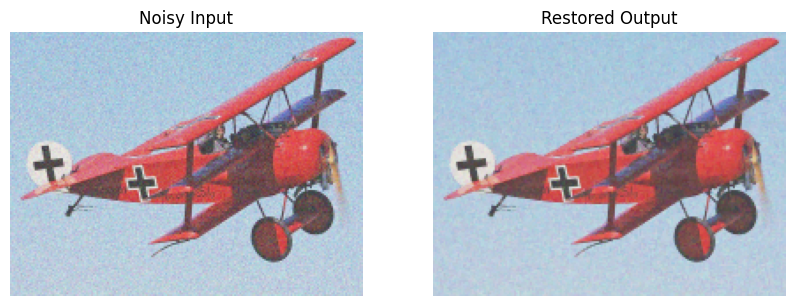

In [21]:
display_images(noisy, denoised)

# MMSE - quadratic

In [22]:
num_iter = 80
sampler = GibbsSampler(mrf, num_iter=80, burn_in=40, verbose=True, estimate_mode='mean', pior_type_for_optimal='quadratic')
sampler.fit_optimised(parallel_channels=True, shuffle_pixels=True)
denoised = sampler.estimate()

[Channel 2][Iter 10] Loss=234676.11, Energy=238083.04
[Channel 1][Iter 10] Loss=253344.42, Energy=256766.44
[Channel 0][Iter 10] Loss=258403.56, Energy=261232.07
[Channel 1][Iter 20] Loss=251276.74, Energy=254663.72
[Channel 2][Iter 20] Loss=232986.79, Energy=236363.34
[Channel 0][Iter 20] Loss=256355.72, Energy=259152.54
[Channel 1][Iter 30] Loss=250656.20, Energy=254034.52
[Channel 2][Iter 30] Loss=232433.42, Energy=235801.34
[Channel 0][Iter 30] Loss=255463.64, Energy=258247.10
[Channel 1][Iter 40] Loss=250014.11, Energy=253382.74
[Channel 2][Iter 40] Loss=232139.78, Energy=235503.11
[Channel 0][Iter 40] Loss=255077.51, Energy=257856.38
[Channel 1][Iter 50] Loss=249686.28, Energy=253051.79
[Channel 2][Iter 50] Loss=231609.09, Energy=234967.39
[Channel 0][Iter 50] Loss=254738.73, Energy=257512.17
[Channel 1][Iter 60] Loss=249443.10, Energy=252803.06
[Channel 2][Iter 60] Loss=231402.08, Energy=234755.41
[Channel 0][Iter 60] Loss=254327.50, Energy=257096.39
[Channel 1][Iter 70] Loss=24

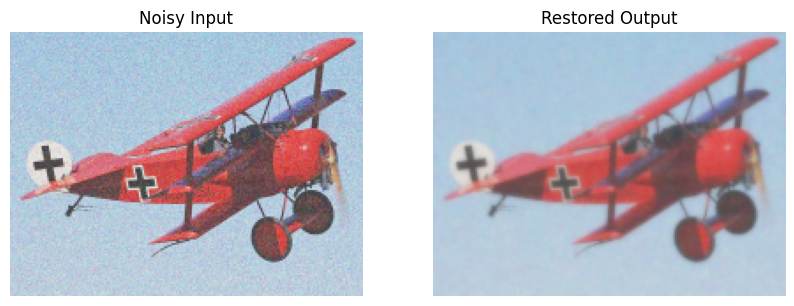

In [23]:
display_images(noisy, denoised)

# MMSE - potts

In [24]:
num_iter = 80
sampler = GibbsSampler(mrf, num_iter=80, burn_in=40, verbose=True, estimate_mode='mean', pior_type_for_optimal='potts')
sampler.fit_optimised(parallel_channels=True, shuffle_pixels=True)
denoised = sampler.estimate()

[Channel 0][Iter 10] Loss=336881.45, Energy=343704.93
[Channel 2][Iter 10] Loss=280879.90, Energy=287829.18
[Channel 1][Iter 10] Loss=321851.63, Energy=329511.95
[Channel 2][Iter 20] Loss=277556.56, Energy=284419.97
[Channel 0][Iter 20] Loss=334171.95, Energy=340907.52
[Channel 1][Iter 20] Loss=318698.69, Energy=326258.49
[Channel 1][Iter 30] Loss=317371.05, Energy=324882.48
[Channel 0][Iter 30] Loss=332591.90, Energy=339276.85
[Channel 2][Iter 30] Loss=275608.92, Energy=282428.46
[Channel 1][Iter 40] Loss=316011.05, Energy=323477.42
[Channel 0][Iter 40] Loss=331333.24, Energy=337984.14
[Channel 2][Iter 40] Loss=274130.14, Energy=280911.72
[Channel 1][Iter 50] Loss=315143.94, Energy=322580.73
[Channel 2][Iter 50] Loss=273416.37, Energy=280184.43
[Channel 0][Iter 50] Loss=330860.25, Energy=337485.83
[Channel 2][Iter 60] Loss=272389.02, Energy=279136.12
[Channel 1][Iter 60] Loss=314337.80, Energy=321750.12
[Channel 0][Iter 60] Loss=330139.16, Energy=336743.91
[Channel 2][Iter 70] Loss=27

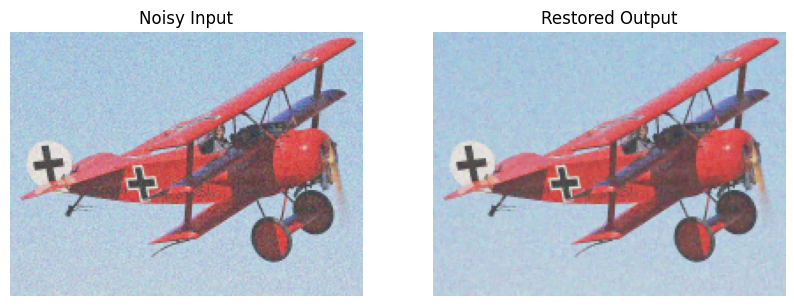

In [25]:
display_images(noisy, denoised)

In [ ]:
from Utils.utils import generate_and_save_denoised_images


generate_and_save_denoised_images(noisy_path, output_folder_str="output")